In [1]:
from disentangle.data_loader.train_val_data import get_train_val_data
from disentangle.config_utils import load_config
from disentangle.scripts.evaluate import get_data_dir
from disentangle.core.data_split_type import DataSplitType
from disentangle.core.tiff_reader import save_tiff, load_tiff
import os

gt_root_dir = "/group/jug/ashesh/kth_data"
pred_rootdir = "/group/jug/ashesh/training/disentangle"
output_data_dir = "/group/jug/ashesh/naturemethods/three_splitting_sampling/"

In [2]:
crops_pred_dirs = {
    "2408/D25-M3-S0-L8/4": "/group/jug/ashesh/data/paper_stats/Test_P64_G32_M50_Sk0/stats_training_disentangle_2406_D25-M3-S0-L8_4.pkl",
}
mean_dict = {
    "2408/D25-M3-S0-L8/4": [100.324554, 99.48034, 100.09666],
}
std_dict = {
    "2408/D25-M3-S0-L8/4": [4.054161, 3.5108304, 3.418721],
}

In [3]:
keys = ["2408/D25-M3-S0-L8/4"]

data_shape = {
    "D21": (1, 1608, 1608, 3),
    "D25": (10, 1608, 1608, 4),
    "D18": (1, 4096, 4096, 3),
}

In [4]:
idx_dict = {}
val_data_dict = {}


def get_hwt(dset_idx, grid_idx_manager):
    t, h, w, _ = grid_idx_manager.get_patch_location_from_dataset_idx(dset_idx)
    return h, w, t


def get_dtype(key):
    return key.split("/")[1].split("-")[0]


In [5]:
import pickle
import numpy as np

key = keys[0]

with open(crops_pred_dirs[key], "rb") as f:
    data = pickle.load(f)
    for ch_idx in data["pred"].keys():
        data["pred"][ch_idx] = np.concatenate([x[None] for x in data["pred"][ch_idx]], axis=0)

print(len(data["inp"]), data["inp"][0].shape)
print(len(data["tar"]), data["tar"][0].shape)
print(len(data["pred"]), len(data["pred"][0]))

10 torch.Size([1, 3, 64, 64])
10 torch.Size([1, 3, 64, 64])
3 10


In [ ]:
# import torch
# from disentangle.core.tiff_reader import save_tiff

# ex_idx = 9
# inp_tmp = torch.stack(data["inp"], dim=0).squeeze()[ex_idx].cpu().numpy()
# pred_tmp = np.stack([data["pred"][i] for i in range(3)], axis=0)[:, ex_idx]
# tar_tmp = torch.stack(data["tar"], dim=0).squeeze()[ex_idx : ex_idx + 1].cpu().numpy()
# # swap the first two axes for pred_tmp
# pred_tmp = np.transpose(pred_tmp, (1, 0, 2, 3))
# inp_tmp = inp_tmp[None]


# datadir = "/group/jug/ashesh/naturemethodsFinalRawImages/Fig2"
# save_tiff(os.path.join(datadir, "input.tif"), inp_tmp)
# save_tiff(os.path.join(datadir, "predicted_samples.tif"), pred_tmp)
# save_tiff(os.path.join(datadir, "target.tif"), tar_tmp)
# # plt.imshow(tar_tmp[0,2])

In [46]:
pred_tmp.shape, inp_tmp.shape, tar_tmp.shape

((50, 3, 64, 64), (1, 3, 64, 64), (1, 3, 64, 64))

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:14: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imsave`.
  imsave(path, data, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:14: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imsave`.
  imsave(path, data, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:14: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and wil

In [ ]:
config = load_config(
    os.path.join(pred_rootdir, os.path.join("/group/jug/ashesh/training/disentangle", key), "config.pkl")
)
dtype = get_dtype(key)
val_data_internal = get_train_val_data(
    config.data,
    get_data_dir(int(dtype[1:])),
    DataSplitType.Test,
    val_fraction=config.training.val_fraction,
    test_fraction=config.training.test_fraction,
)
val_data_dict[dtype] = val_data_internal

Loading from /group/jug/ashesh/data//nikola_data/20240531/Set1/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data//nikola_data/20240531/Set2/uSplit_500ms.nd2
ND2 dimensions: {'P': 11, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data//nikola_data/20240531/Set3/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data//nikola_data/20240531/Set4/uSplit_500ms.nd2
ND2 dimensions: {'P': 20, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data//nikola_data/20240531/Set5/uSplit_500ms.nd2
ND2 dimensions: {'P': 21, 'C': 19, 'Y': 1608, 'X': 1608}; RGB: False; datatype: uint16; legacy: False
Loading from /group/jug/ashesh/data//nikola_data/20240531/Set6/uSplit_500ms.nd2
ND2 dimens

In [ ]:
from disentangle.data_loader.patch_index_manager import GridIndexManager, TilingMode
import matplotlib.patches as patches
import matplotlib.pyplot as plt

grid_idx_manager = GridIndexManager(
    data_shape[get_dtype(key)], (1, 32, 32, 4), (1, 64, 64, 4), TilingMode.ShiftBoundary
)

In [ ]:
def get_larger_data(dset_idx, val_data, ex_h=64, grid_size=32, patch_size=64):
    h, w, t = get_hwt(dset_idx, grid_idx_manager)
    assert h >= ex_h and w >= ex_h, f"{(h, w)}"
    # print(h,w,t, ex_h)
    # inner_pad = (patch_size - grid_size)//2
    # print(val_data.shape)
    if isinstance(val_data, np.ndarray):
        data = val_data[t, h - ex_h : h + patch_size + ex_h, w - ex_h : w + patch_size + ex_h]
    else:
        # assert isinstance(val_data, list)
        data = val_data[t][0][h - ex_h : h + patch_size + ex_h, w - ex_h : w + patch_size + ex_h]
    return data


def get_larger_input(dset_idx, val_data, ex_h=64, grid_size=32, patch_size=64):
    data = get_larger_data(dset_idx, val_data, ex_h=ex_h, grid_size=grid_size, patch_size=patch_size)
    if data.shape[-1] == 3:
        return data[..., 2], (ex_h, ex_h)
    else:
        return data.mean(axis=-1), (ex_h, ex_h)


In [ ]:
idx_dict = {"2408/D25-M3-S0-L8/4": []}

In [ ]:
dset_idx = np.random.randint(0, len(data["inp"]))
extra_pad = 32
extra_input, top_left_hw = get_larger_input(dset_idx, val_data_dict[dtype], ex_h=extra_pad)
plt.imshow(extra_input)

AssertionError: (np.int64(0), np.int64(224))

idx  2
vmin,vmax -0.78970337 0.5987625
vmin,vmax -1.2807922 1.379158
vmin,vmax -16.507568 20.420952
/group/jug/ashesh/naturemethods/three_splitting_sampling/sample_2408_D25-M3-S0-L8_4_Idx-3414.png


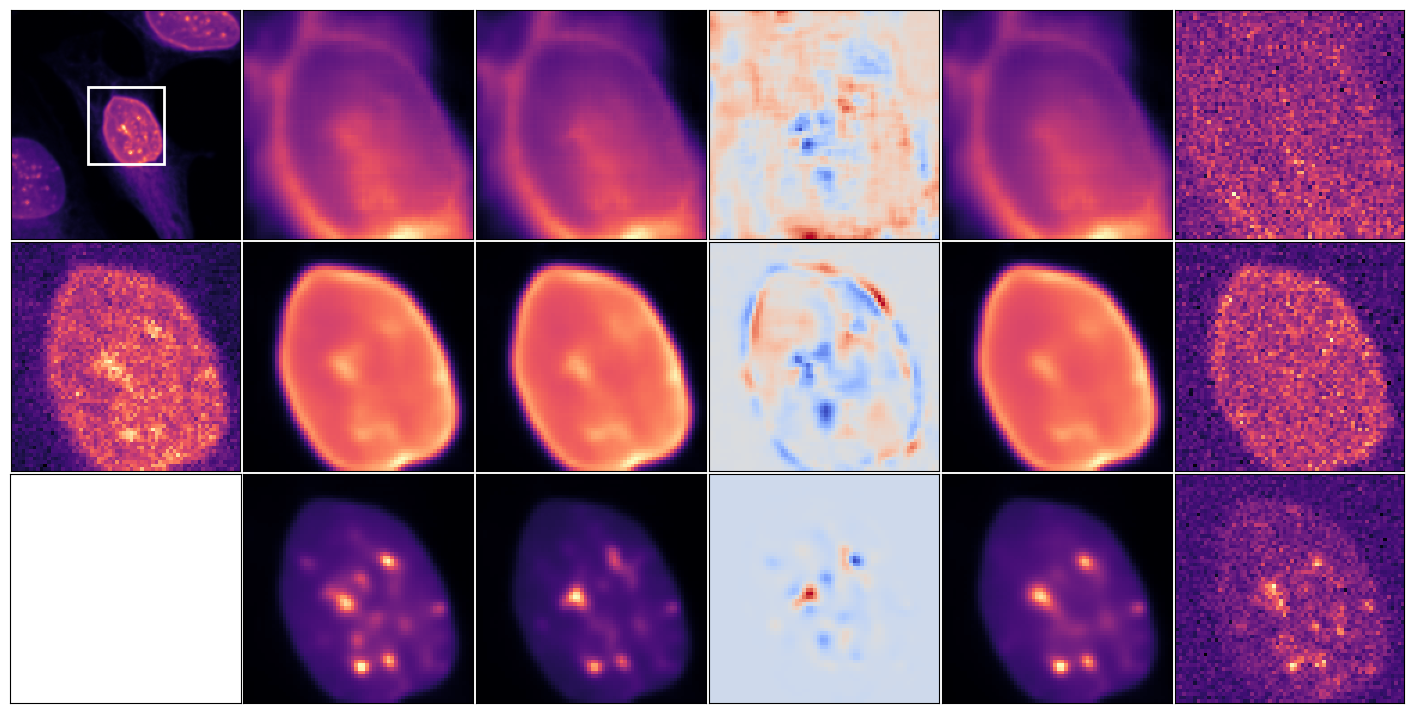

In [ ]:
# inp, pred1, pred2, diff, predmmse, tar
import matplotlib.pyplot as plt
import numpy as np
from disentangle.analysis.plot_utils import clean_ax

imsz = 3
ncols = 6
nrows = 3
ex_idx = np.random.randint(0, len(data["inp"]))  #
print("idx ", ex_idx)

_, ax = plt.subplots(figsize=(imsz * ncols, imsz * nrows), ncols=ncols, nrows=nrows)
dset_idx = data["idx"][ex_idx]

dtype = get_dtype(key)
if dtype in val_data_dict:
    extra_pad = 64
    extra_input, top_left_hw = get_larger_input(dset_idx, val_data_dict[dtype], ex_h=extra_pad)
    rect = patches.Rectangle(top_left_hw, 64, 64, linewidth=2, edgecolor="w", facecolor="none")
    ax[0, 0].imshow(extra_input, cmap="magma")
    ax[0, 0].add_patch(rect)

ax[1, 0].imshow(data["inp"][ex_idx][0, 0].cpu().numpy(), cmap="magma")
# ch 0
pred0_1 = data["pred"][0][ex_idx][0]
pred0_2 = data["pred"][0][ex_idx][1]
ax[0, 1].imshow(pred0_1, cmap="magma")
ax[0, 2].imshow(pred0_2, cmap="magma")
ax[0, 3].imshow(pred0_2 - pred0_1, cmap="coolwarm")
print("vmin,vmax", np.min(pred0_2 - pred0_1), np.max(pred0_2 - pred0_1))
ax[0, 4].imshow(np.mean(data["pred"][0][ex_idx], axis=0), cmap="magma")
ax[0, 5].imshow(data["tar"][ex_idx][0, 0].cpu().numpy(), cmap="magma")


# ch 1
pred1_1 = data["pred"][1][ex_idx][0]
pred1_2 = data["pred"][1][ex_idx][1]

ax[1, 1].imshow(pred1_1, cmap="magma")
ax[1, 2].imshow(pred1_2, cmap="magma")
ax[1, 3].imshow(pred1_2 - pred1_1, cmap="coolwarm")
print("vmin,vmax", np.min(pred1_2 - pred1_1), np.max(pred1_2 - pred1_1))
ax[1, 4].imshow(np.mean(data["pred"][1][ex_idx], axis=0), cmap="magma")
ax[1, 5].imshow(data["tar"][ex_idx][0, 1].cpu().numpy(), cmap="magma")

# ch 2
pred2_1 = data["pred"][2][ex_idx][0]
pred2_2 = data["pred"][2][ex_idx][1]

ax[2, 1].imshow(pred2_1, cmap="magma")
ax[2, 2].imshow(pred2_2, cmap="magma")
ax[2, 3].imshow(pred2_2 - pred2_1, cmap="coolwarm")
print("vmin,vmax", np.min(pred2_2 - pred2_1), np.max(pred2_2 - pred2_1))
ax[2, 4].imshow(np.mean(data["pred"][2][ex_idx], axis=0), cmap="magma")
ax[2, 5].imshow(data["tar"][ex_idx][0, 2].cpu().numpy(), cmap="magma")

clean_ax(ax)
plt.subplots_adjust(wspace=0.01, hspace=0.01)
fname = f"sample_{key.replace('/', '_')}_Idx-{dset_idx}.png"
fpath = os.path.join(output_data_dir, fname)

print(fpath)
# plt.savefig(fpath, dpi=200)


In [ ]:
factor_fpath = (
    crops_pred_dirs[key].replace("stats_training_disentangle", "calib_training_disentangle").replace("Test_", "Val_")
)
with open(factor_fpath, "rb") as f:
    calibration_data = pickle.load(f)

for i in range(3):
    assert "scalar" in calibration_data[i], "No scalar in calibration data"

In [ ]:
def get_pred_std(samples, mean_val, std_val):
    samples = (samples - mean_val) / std_val
    mmse_std = np.std(samples, axis=0)
    return mmse_std


def estimated_rmse(samples, calibration_factor, mean_val, std_val):
    pred_std = get_pred_std(samples, mean_val, std_val)
    print(pred_std.max())
    scaled_std = pred_std * calibration_factor
    return scaled_std


In [ ]:
def normalize(data, ch_idx):
    return (data - mean_dict[key][ch_idx]) / std_dict[key][ch_idx]

9
/group/jug/ashesh/naturemethods/three_splitting_sampling/sample_prediction_3414_2406_D25-M3-S0-L8_4.png


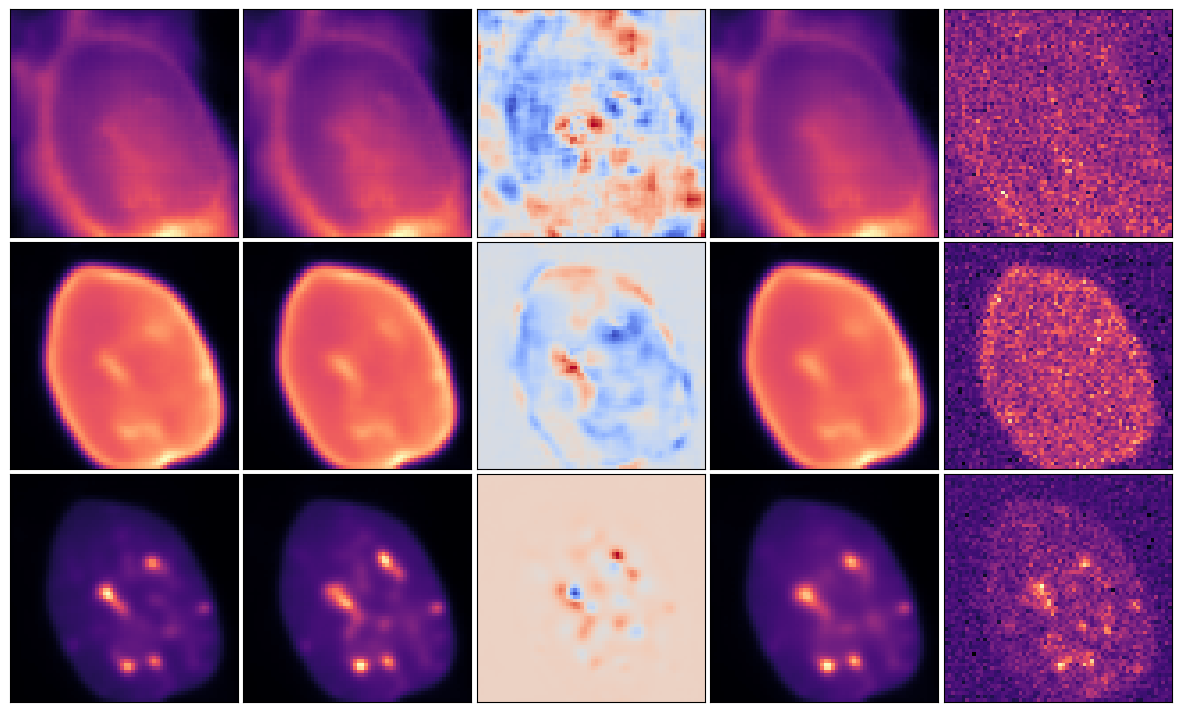

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from disentangle.analysis.plot_utils import clean_ax

ex_idx = np.random.randint(len(data["tar"]))  # 22,177
print(ex_idx)
n_channels = len(data["pred"].keys())
nrows = n_channels
ncols = 5
img_sz = 3
save_plots = True


_, ax = plt.subplots(figsize=(img_sz * ncols, img_sz * nrows), ncols=ncols, nrows=nrows)
for ch_idx in range(n_channels):
    pred0_1 = data["pred"][ch_idx][ex_idx][0]
    pred0_2 = data["pred"][ch_idx][ex_idx][1]
    ax[ch_idx, 0].imshow(pred0_1, cmap="magma")
    ax[ch_idx, 1].imshow(pred0_2, cmap="magma")
    ax[ch_idx, 2].imshow(pred0_2 - pred0_1, cmap="coolwarm")
    ax[ch_idx, 3].imshow(np.mean(data["pred"][ch_idx][ex_idx], axis=0), cmap="magma")
    ax[ch_idx, 4].imshow(data["tar"][ex_idx][0, ch_idx].cpu().numpy(), cmap="magma")


clean_ax(ax)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
if save_plots:
    img_fname = (
        os.path.basename(crops_pred_dirs[key])
        .replace("stats_training_disentangle", f"sample_prediction_{data['idx'][ex_idx]}")
        .replace(".pkl", ".png")
    )
    img_fpath = os.path.join(output_data_dir, img_fname)
    plt.savefig(img_fpath, dpi=300)
    print(img_fpath)

In [26]:
tmp_data = get_larger_data(data["idx"][ex_idx], val_data_dict[dtype], ex_h=0)
print(tmp_data.shape)
data.keys()

(64, 64, 4)


dict_keys(['inp', 'tar', 'pred', 'idx'])

/group/jug/ashesh/naturemethods/three_splitting_sampling/sample_input_3414_2406_D25-M3-S0-L8_4.pdf


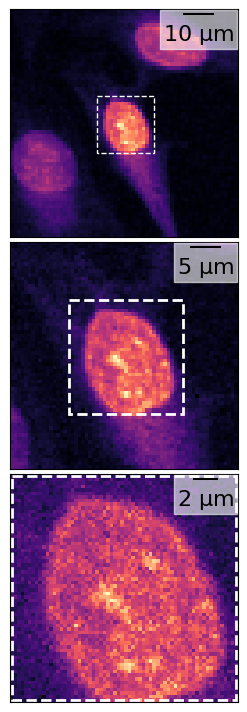

In [30]:
import matplotlib.patches as patches
from matplotlib_scalebar.scalebar import ScaleBar

_, ax = plt.subplots(figsize=(img_sz, 3 * img_sz), ncols=1, nrows=3)
ax = ax[::-1]
ax[0].imshow(data["inp"][ex_idx][0, 0].cpu().numpy(), cmap="magma")
ax[1].imshow(data["inp"][ex_idx][0, 1].cpu().numpy(), cmap="magma")
ax[2].imshow(data["inp"][ex_idx][0, 2].cpu().numpy(), cmap="magma")
clean_ax(ax)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
rect0 = patches.Rectangle((0, 0), 63, 63, linewidth=2, edgecolor="w", linestyle="--", facecolor="none")
ax[0].add_patch(rect0)
scalebar = ScaleBar(
    285,
    "nm",
    # length_fraction=0.1,
    box_alpha=0.6,
    frameon=True,
    location="upper right",
    font_properties={"size": 16},
)
ax[0].add_artist(scalebar)


rect1 = patches.Rectangle((16, 16), 32, 32, linewidth=2, edgecolor="w", linestyle="--", facecolor="none")
ax[1].add_patch(rect1)
scalebar = ScaleBar(
    570,
    "nm",
    # length_fraction=0.1,
    box_alpha=0.6,
    frameon=True,
    location="upper right",
    font_properties={"size": 16},
)
ax[1].add_artist(scalebar)

rect2 = patches.Rectangle((24, 24), 16, 16, linewidth=1, edgecolor="w", linestyle="--", facecolor="none")
ax[2].add_patch(rect2)
scalebar = ScaleBar(
    1140,
    "nm",
    # length_fraction=0.1,
    box_alpha=0.6,
    frameon=True,
    location="upper right",
    font_properties={"size": 16},
)
ax[2].add_artist(scalebar)

if save_plots:
    input_fpath = img_fpath.replace("sample_prediction_", "sample_input_")
    input_fpath = input_fpath.replace(".png", ".pdf")
    print(input_fpath)
    plt.savefig(input_fpath, dpi=300)


0.058751393
0 3.0202093 0.03154009647954846 0.5298498462532811
0.22912909
0 6.0819945 0.0028363044083689302 0.4874325768474368
1.9251817
0 10.287006 0.002507126875748949 3.0248187563008813
/group/jug/ashesh/naturemethods/three_splitting_sampling/calibration_overlay_3414_2406_D25-M3-S0-L8_4.png


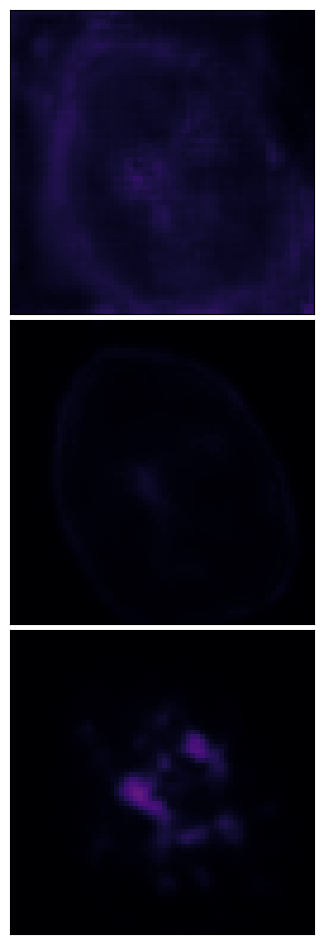

In [31]:
import seaborn as sns

_, ax = plt.subplots(figsize=(4, 12), nrows=3)
for ch_idx in range(3):
    samples = data["pred"][ch_idx][ex_idx]
    calib_factor = calibration_data[ch_idx]["scalar"]
    rmse = estimated_rmse(samples, calib_factor, mean_dict[key][ch_idx], std_dict[key][ch_idx])
    # sns.heatmap(rmse, ax=ax[ch_idx])
    pred_tmp = np.mean(samples, axis=0)
    vmax, vmin = pred_tmp.max(), pred_tmp.min()
    vmax = (vmax - mean_dict[key][ch_idx]) / std_dict[key][ch_idx]
    vmin = (vmin - mean_dict[key][ch_idx]) / std_dict[key][ch_idx]
    vmax = vmax - vmin
    vmin = 0
    print(vmin, vmax, rmse.min(), rmse.max())
    ax[ch_idx].imshow(rmse, cmap="magma", vmin=vmin, vmax=vmax, alpha=1)
    # ax[ch_idx].imshow(pred_tmp, cmap='gray', alpha=0.3)
clean_ax(ax)
plt.subplots_adjust(wspace=0.02, hspace=0.02)
if save_plots:
    input_fpath = img_fpath.replace("sample_prediction_", "calibration_overlay_")
    print(input_fpath)
    plt.savefig(input_fpath, dpi=200)


/group/jug/ashesh/naturemethods/three_splitting_sampling/multiple_samples_ch2_3414_2406_D25-M3-S0-L8_4.pdf


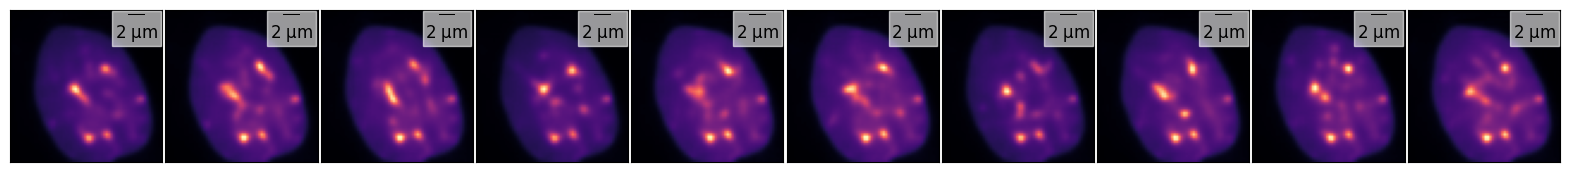

In [32]:
ncols = 10
_, ax = plt.subplots(figsize=(2 * ncols, 2), ncols=ncols)
for i in range(ncols):
    ax[i].imshow(data["pred"][2][ex_idx][i], cmap="magma")
    scalebar = ScaleBar(
        285,
        "nm",
        # length_fraction=0.1,
        box_alpha=0.6,
        frameon=True,
        location="upper right",
        font_properties={"size": 12},
    )
    ax[i].add_artist(scalebar)

clean_ax(ax)

# remove the space between the subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
if save_plots:
    input_fpath = img_fpath.replace("sample_prediction_", "multiple_samples_ch2_")
    input_fpath = input_fpath.replace(".png", ".pdf")
    print(input_fpath)
    plt.savefig(input_fpath, dpi=200)


In [ ]:
# from disentangle.analysis.paper_plots import get_first_index, get_last_index
# calib_plot_fpath = crops_pred_dirs[key].replace('stats_training_disentangle', 'calib_stats_training_disentangle').replace('Test_','Val_')
# with open(calib_plot_fpath, 'rb') as f:
#     calibration_plot_data = pickle.load(f)

# def get_rmv_rmse(q_s = 0.001, q_e = 0.999):
#     data = {}
#     for ch_idx in range(len(calibration_plot_data['calib_stats'])):
#         tmp_stats = calibration_plot_data['calib_stats'][ch_idx]
#         tmp_rmv = tmp_stats['rmv']
#         tmp_rmse = tmp_stats['rmse']
#         tmp_rmse_err = tmp_stats['rmse_err']

#         count = tmp_stats['bin_count']
#         first_idx = get_first_index(count, q_s)
#         last_idx = get_last_index(count, q_e)
#         data[ch_idx] = {'rmv':tmp_rmv[first_idx:-last_idx],
#                         'rmse': tmp_rmse[first_idx:-last_idx],
#                         'rmse_err': tmp_rmse_err[first_idx:-last_idx]}
#     return data



In [ ]:
# cimg_sz = 2
# _,ax = plt.subplots(figsize=(cimg_sz*1.1, n_channels*cimg_sz),ncols=1,nrows=n_channels)
# rmv_rmse_dict = get_rmv_rmse()
# for ch_idx in range(n_channels):
#     ax[ch_idx].grid()
#     maxval = max(np.max(rmv_rmse_dict[ch_idx]['rmv']), np.max(rmv_rmse_dict[ch_idx]['rmse']))
#     rmse_pdata = np.array(rmv_rmse_dict[ch_idx]['rmse'])
#     error = np.array(rmv_rmse_dict[ch_idx]['rmse_err'])
#     ax[ch_idx].plot(rmv_rmse_dict[ch_idx]['rmv'], rmse_pdata, '-+', color='blue')
#     ax[ch_idx].plot([0, maxval], [0, maxval], '--', color='black')
#     ax[ch_idx].fill_between(rmv_rmse_dict[ch_idx]['rmv'], rmse_pdata-error, rmse_pdata+error, alpha=0.5)

#     ax[ch_idx].set_facecolor('lightgray')
#     # set xtick size
#     ax[ch_idx].tick_params(axis='both', which='major', labelsize=8)
#     ax[ch_idx].yaxis.set_label_position("right")
#     ax[ch_idx].yaxis.tick_right()

# plt.subplots_adjust(wspace=0.02, hspace=0.4)
# if save_plots:
#     calib_plot_fpath = img_fpath.replace('sample_prediction', 'calibration_plot')
#     plt.tight_layout()
#     plt.savefig(calib_plot_fpath, dpi=200)
#     print(calib_plot_fpath)
